In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load Dataset

In [51]:
# Load dataset
train = pd.read_csv("application_train.csv")
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [53]:
print(train['TARGET'])

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64


# EDA

## Gender Distribution

In [54]:
if 'train' in locals() or 'train' in globals():
    print(f"Jumlah baris awal dalam dataframe 'train': {len(train)}")
    
    if 'CODE_GENDER' in train.columns:
        rows_with_xna_count = (train['CODE_GENDER'] == 'XNA').sum()
        print(f"Jumlah baris dengan CODE_GENDER = 'XNA': {rows_with_xna_count}")


        train_cleaned = train[train['CODE_GENDER'] != 'XNA'].copy()


        print(f"Jumlah baris setelah menghapus baris dengan CODE_GENDER = 'XNA': {len(train_cleaned)}")
        


    else:
        print("Error: Kolom 'CODE_GENDER' tidak ditemukan dalam dataframe 'train'.")
else:
    print("Error: Dataframe 'train' tidak ditemukan. Pastikan Anda sudah memuatnya.")

Jumlah baris awal dalam dataframe 'train': 307511
Jumlah baris dengan CODE_GENDER = 'XNA': 4
Jumlah baris setelah menghapus baris dengan CODE_GENDER = 'XNA': 307507


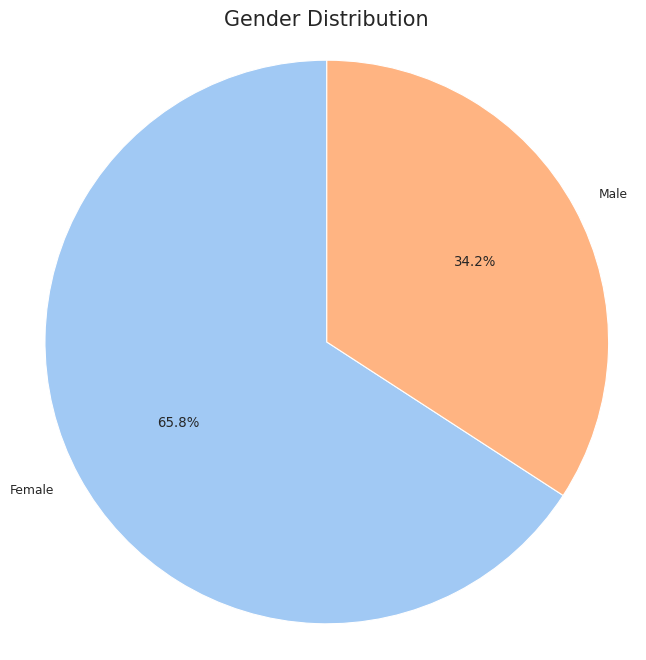

In [55]:
gender_counts_all = train['CODE_GENDER'].value_counts()


valid_gender_keys = ['M', 'F']

gender_counts_filtered = gender_counts_all[gender_counts_all.index.isin(valid_gender_keys)]


if gender_counts_filtered.empty:
    print("Peringatan: Tidak ada data untuk gender 'M' atau 'F' setelah filter. Chart tidak akan dibuat.")
    labels = []
    sizes = []
else:

    label_mapping = {
        'M': 'Male',
        'F': 'Female'
    }


    gender_counts_labelled = gender_counts_filtered.rename(index=label_mapping)


    labels = gender_counts_labelled.index 
    sizes = gender_counts_labelled.values

if list(labels) and list(sizes): 
    plt.figure(figsize=(8, 8)) 
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Gender Distribution', fontsize=15)
    plt.axis('equal') 
    plt.show()
else:
    if not gender_counts_filtered.empty: 
        print("Terjadi masalah saat mempersiapkan label atau ukuran untuk chart.")

## Children Count Distribution

/tmp/ipykernel_2983/1384033511.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train, x='CNT_CHILDREN', order=order_children, palette='viridis')


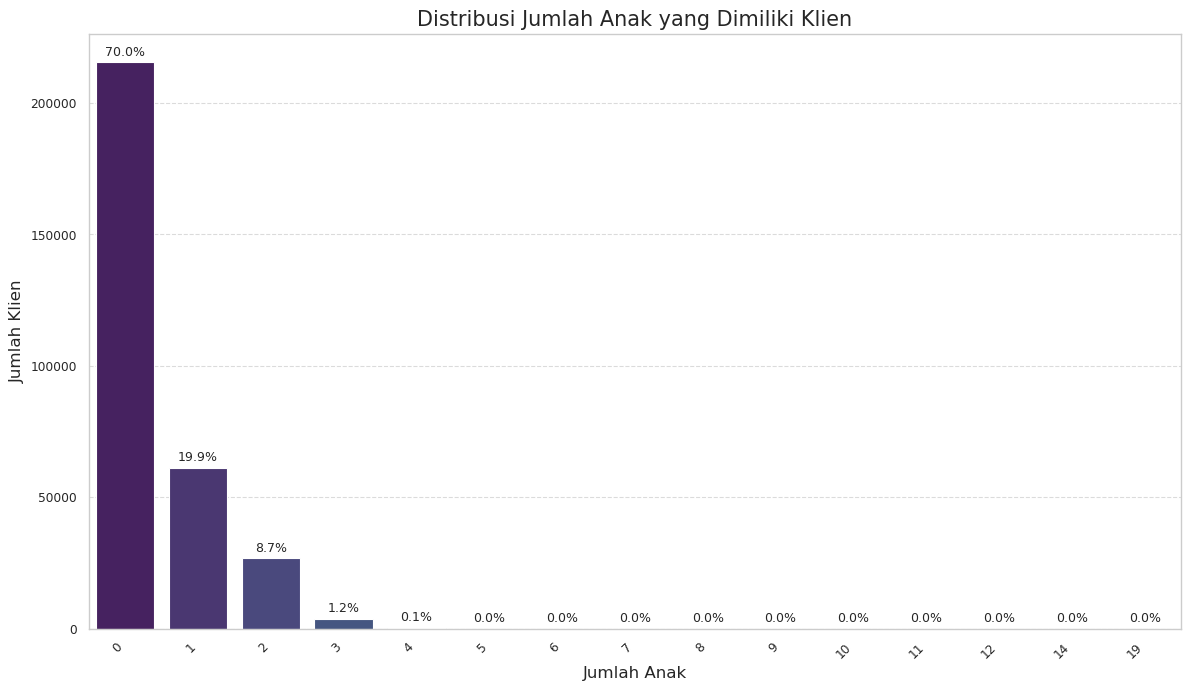

In [56]:
plt.figure(figsize=(12, 7))
order_children = sorted(train['CNT_CHILDREN'].dropna().unique())

ax = sns.countplot(data=train, x='CNT_CHILDREN', order=order_children, palette='viridis')
plt.title('Distribusi Jumlah Anak yang Dimiliki Klien', fontsize=15)
plt.xlabel('Jumlah Anak', fontsize=12)
plt.ylabel('Jumlah Klien', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)


total = len(train['CNT_CHILDREN'].dropna())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + total*0.005, 
            '{:1.1f}%'.format((height/total)*100),
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

## Income Type Distribution

/tmp/ipykernel_2983/3965925701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=income_counts.index, x=income_counts.values, palette='mako', orient='h')


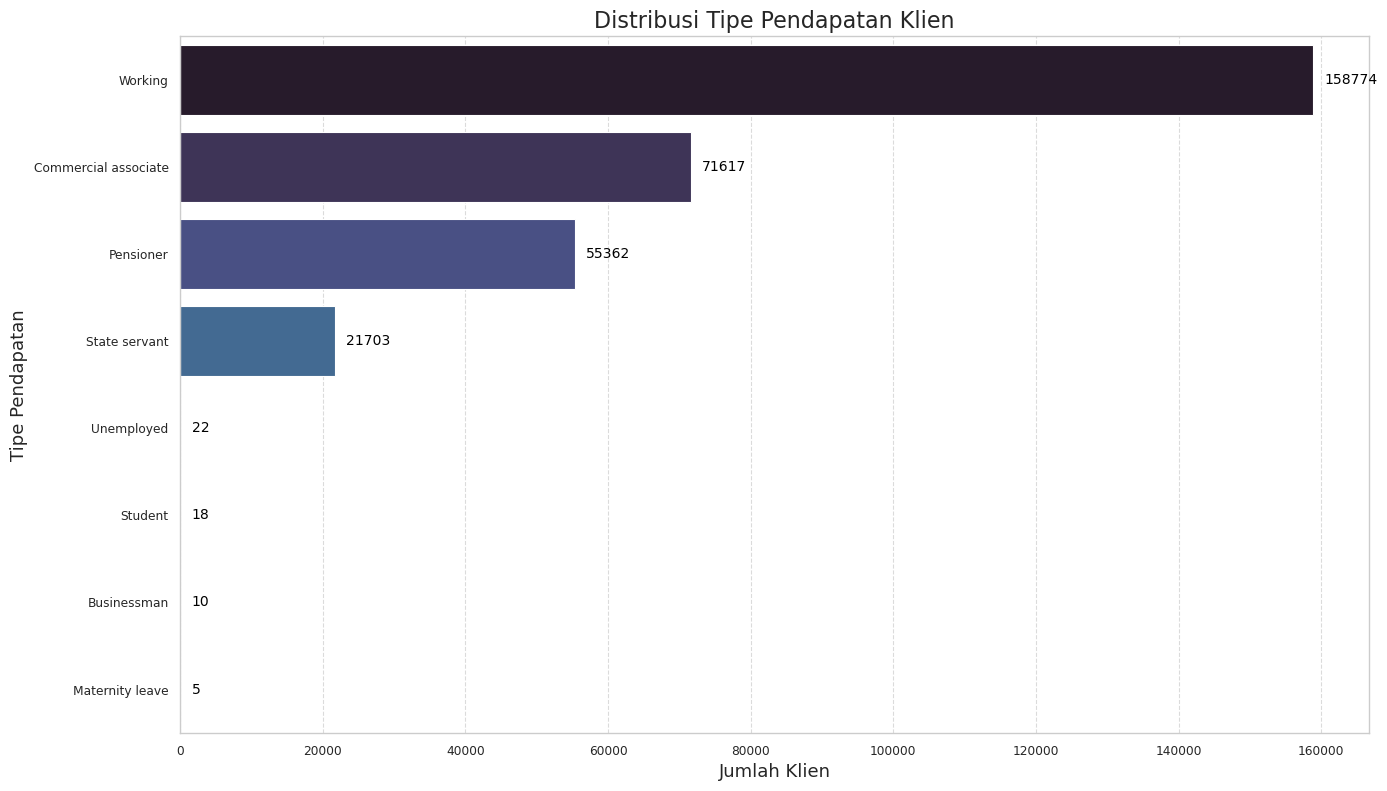


Frekuensi Tipe Pendapatan Klien:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


In [57]:
plt.figure(figsize=(14, 8)) 

income_counts = train['NAME_INCOME_TYPE'].value_counts()

ax = sns.barplot(y=income_counts.index, x=income_counts.values, palette='mako', orient='h')

plt.title('Distribusi Tipe Pendapatan Klien', fontsize=16)
plt.xlabel('Jumlah Klien', fontsize=13)
plt.ylabel('Tipe Pendapatan', fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(income_counts.values):
    ax.text(v + (income_counts.values.max() * 0.01),
            i, # Posisi y bar
            str(v), 
            color='black', va='center', fontsize=10)


plt.tight_layout()
plt.show()


print("\nFrekuensi Tipe Pendapatan Klien:")
print(income_counts)

## Family Status

/tmp/ipykernel_2983/4043815515.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=family_status_counts.index, x=family_status_counts.values, palette='coolwarm', orient='h')


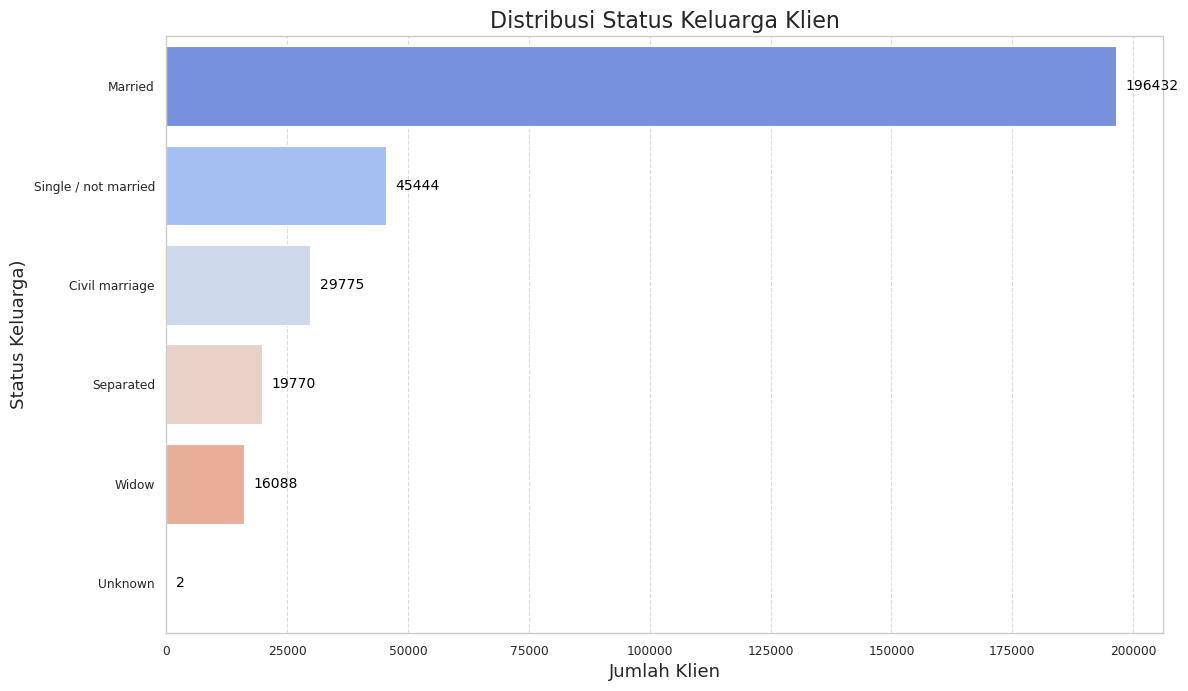


Frekuensi Status Keluarga Klien:
NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


In [58]:
plt.figure(figsize=(12, 7)) 

family_status_counts = train['NAME_FAMILY_STATUS'].value_counts()


ax = sns.barplot(y=family_status_counts.index, x=family_status_counts.values, palette='coolwarm', orient='h')

plt.title('Distribusi Status Keluarga Klien', fontsize=16)
plt.xlabel('Jumlah Klien', fontsize=13)
plt.ylabel('Status Keluarga)', fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.7) 


for i, v in enumerate(family_status_counts.values):
    ax.text(v + (family_status_counts.values.max() * 0.01), 
            i, 
            str(v), 
            color='black', va='center', fontsize=10)

plt.tight_layout() 
plt.show()

print("\nFrekuensi Status Keluarga Klien:")
print(family_status_counts)

## Client Age

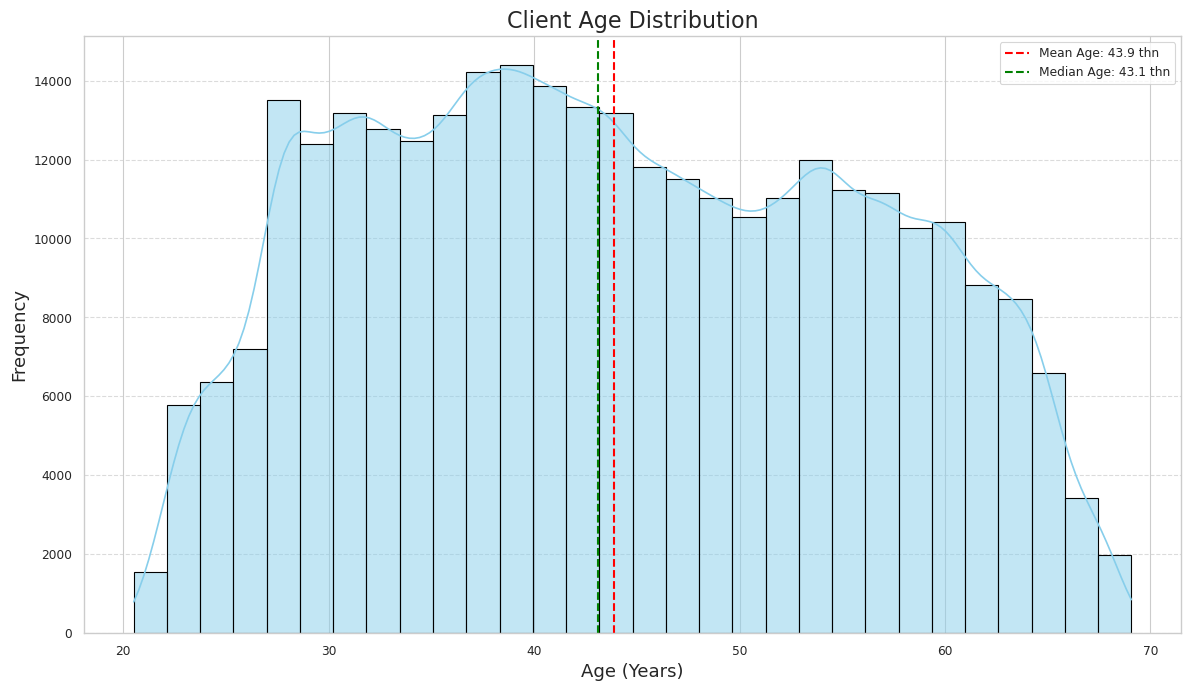

In [59]:

train['AGE_YEARS'] = (train['DAYS_BIRTH'] * -1) / 365.25


plt.figure(figsize=(12, 7))
sns.histplot(train['AGE_YEARS'].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')


plt.title('Client Age Distribution', fontsize=16)
plt.xlabel('Age (Years)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_age = train['AGE_YEARS'].mean()
median_age = train['AGE_YEARS'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean Age: {mean_age:.1f} thn')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1.5, label=f'Median Age: {median_age:.1f} thn')
plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_2983/3595194139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_with_difficulty['AGE_YEARS'] = (clients_with_difficulty['DAYS_BIRTH'] * -1) / 365.25


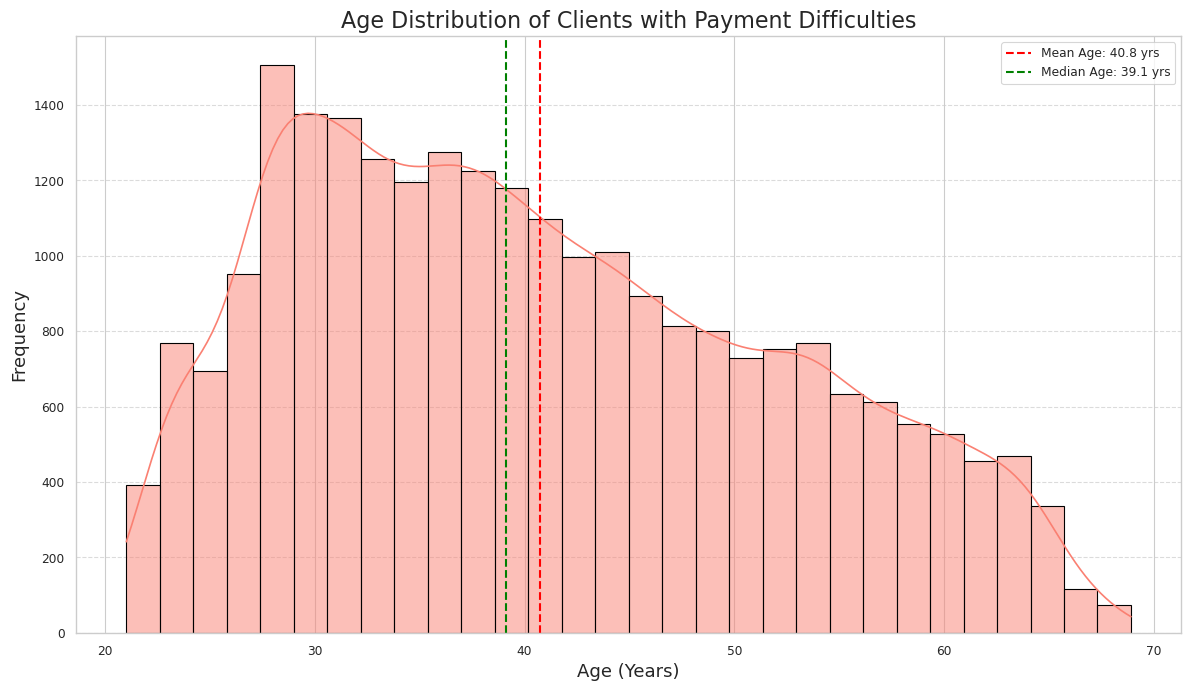

In [60]:
clients_with_difficulty = train[train['TARGET'] == 1]


clients_with_difficulty['AGE_YEARS'] = (clients_with_difficulty['DAYS_BIRTH'] * -1) / 365.25


plt.figure(figsize=(12, 7))
sns.histplot(clients_with_difficulty['AGE_YEARS'].dropna(), kde=True, bins=30, color='salmon', edgecolor='black')

plt.title('Age Distribution of Clients with Payment Difficulties', fontsize=16)
plt.xlabel('Age (Years)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#n
mean_age_difficult = clients_with_difficulty['AGE_YEARS'].mean()
median_age_difficult = clients_with_difficulty['AGE_YEARS'].median()
plt.axvline(mean_age_difficult, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean Age: {mean_age_difficult:.1f} yrs')
plt.axvline(median_age_difficult, color='green', linestyle='dashed', linewidth=1.5, label=f'Median Age: {median_age_difficult:.1f} yrs')
plt.legend()

plt.tight_layout()
plt.show()


## Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

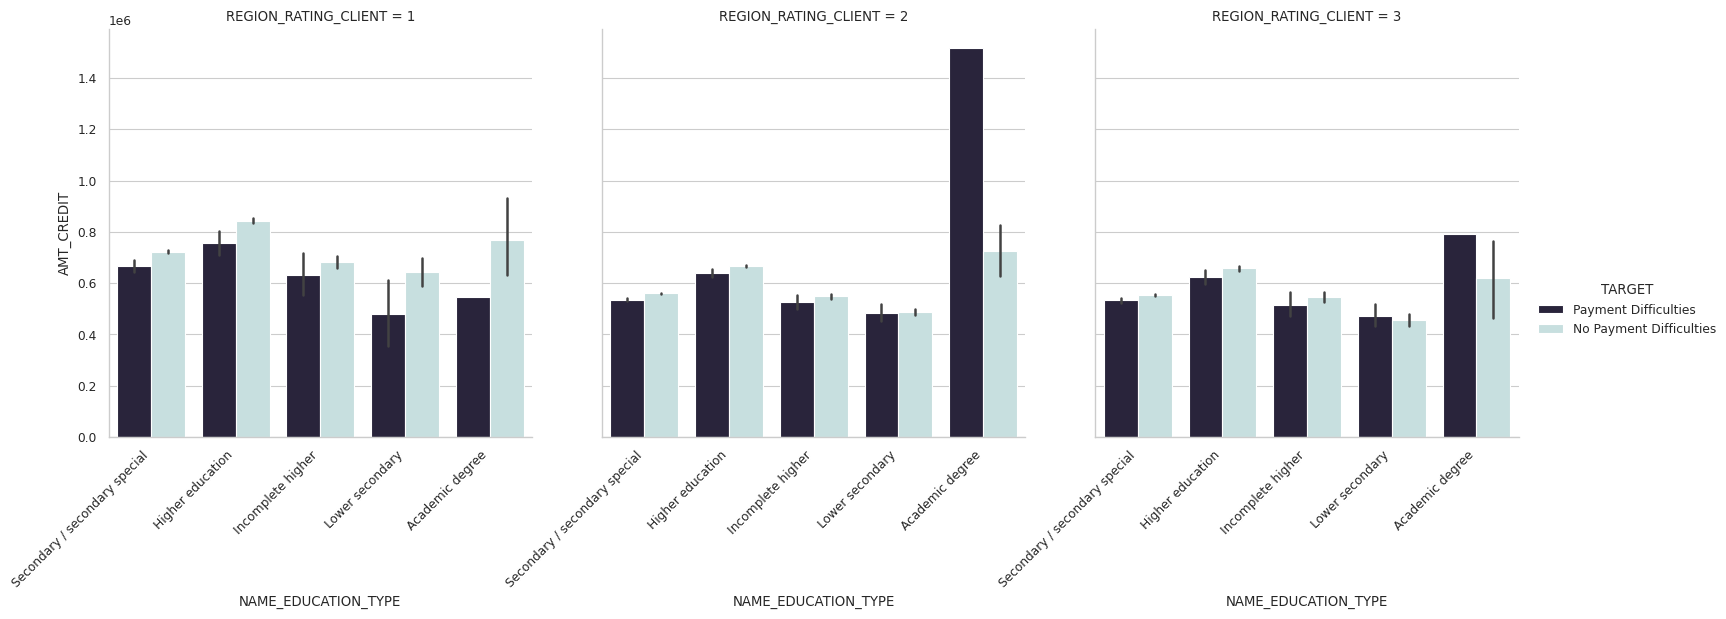

In [61]:
# Buat salinan agar data asli tidak berubah
train_copy = train.copy()

# Ubah nilai pada kolom TARGET menjadi label deskriptif
train_copy['TARGET'] = train_copy['TARGET'].map({0: 'No Payment Difficulties', 1: 'Payment Difficulties'})

# Plot
fig = sns.catplot(
    x='NAME_EDUCATION_TYPE',
    y='AMT_CREDIT',
    hue='TARGET',
    col='REGION_RATING_CLIENT',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train_copy
)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

## Check the Distibution of TARGET column

Frekuensi setiap nilai unik di kolom 'TARGET':
TARGET
0    282686
1     24825
Name: count, dtype: int64


/tmp/ipykernel_2983/433494493.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='TARGET', data=train, palette='viridis')


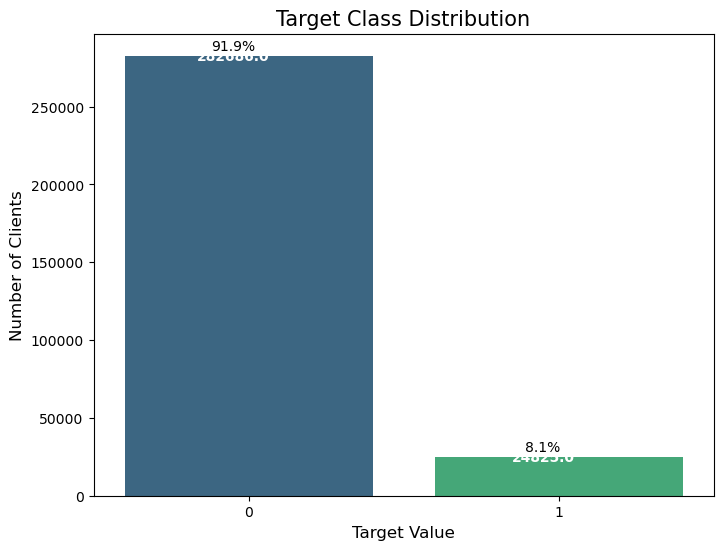

In [3]:
target_counts = train['TARGET'].value_counts()

print("Frekuensi setiap nilai unik di kolom 'TARGET':")
print(target_counts)

# Visualisasi frekuensi (sangat direkomendasikan untuk kolom target)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='TARGET', data=train, palette='viridis')
plt.title('Target Class Distribution', fontsize=15)
plt.xlabel('Target Value', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

# Menambahkan persentase di atas bar
total = len(train['TARGET'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + total*0.005
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
    ax.annotate(f'{p.get_height()}', (x, y-total*0.02), ha='center', va='bottom', color='white', fontweight='bold')


plt.show()

## Check Missing Values

In [4]:
# Tampilkan kolom yang memiliki missing value
missing_cols = train.columns[train.isnull().any()].tolist()

# Cek nilai 'XNA' hanya pada kolom bertipe object
xna_cols = [
    col for col in train.select_dtypes(include="object").columns
    if train[col].astype(str).str.contains('XNA', na=False).any()
]


# Gabungkan dan hilangkan duplikat jika ada
problematic_cols = list(set(missing_cols + xna_cols))

print("Kolom dengan missing value atau 'XNA':")
for col in problematic_cols:
    num_missing = train[col].isnull().sum()
    num_xna = train[col].astype(str).str.contains('XNA').sum()
    print(f"{col}: missing = {num_missing}, 'XNA' = {num_xna}")


Kolom dengan missing value atau 'XNA':
BASEMENTAREA_MODE: missing = 179943, 'XNA' = 0
AMT_REQ_CREDIT_BUREAU_YEAR: missing = 41519, 'XNA' = 0
YEARS_BEGINEXPLUATATION_MEDI: missing = 150007, 'XNA' = 0
CNT_FAM_MEMBERS: missing = 2, 'XNA' = 0
FLOORSMIN_MEDI: missing = 208642, 'XNA' = 0
LANDAREA_AVG: missing = 182590, 'XNA' = 0
EMERGENCYSTATE_MODE: missing = 145755, 'XNA' = 0
DEF_60_CNT_SOCIAL_CIRCLE: missing = 1021, 'XNA' = 0
AMT_REQ_CREDIT_BUREAU_DAY: missing = 41519, 'XNA' = 0
OWN_CAR_AGE: missing = 202929, 'XNA' = 0
ELEVATORS_MEDI: missing = 163891, 'XNA' = 0
ENTRANCES_MEDI: missing = 154828, 'XNA' = 0
APARTMENTS_MODE: missing = 156061, 'XNA' = 0
LIVINGAREA_MEDI: missing = 154350, 'XNA' = 0
OBS_60_CNT_SOCIAL_CIRCLE: missing = 1021, 'XNA' = 0
FLOORSMAX_AVG: missing = 153020, 'XNA' = 0
DAYS_LAST_PHONE_CHANGE: missing = 1, 'XNA' = 0
AMT_REQ_CREDIT_BUREAU_WEEK: missing = 41519, 'XNA' = 0
CODE_GENDER: missing = 0, 'XNA' = 4
AMT_REQ_CREDIT_BUREAU_QRT: missing = 41519, 'XNA' = 0
AMT_REQ_CREDIT

In [5]:
train.drop(train.iloc[:, 44:91], inplace=True, axis=1)
train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [6]:
# after drop some features
print('Missing values status:', train.isnull().values.any())
nvc = pd.DataFrame(train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
...,...,...,...
68,FLAG_DOCUMENT_5,0,0.000000
69,FLAG_DOCUMENT_8,0,0.000000
70,FLAG_DOCUMENT_9,0,0.000000
71,FLAG_DOCUMENT_3,0,0.000000


## Detecting Duplicate Data

In [7]:
print('The number of duplication is:', train.duplicated().sum())
# there is no duplication

The number of duplication is: 0


## Visualize Numerical Columns

/tmp/ipykernel_2983/4074309192.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])
/tmp/ipykernel_2983/4074309192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])
/tmp/ipykernel_2983/4074309192.

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

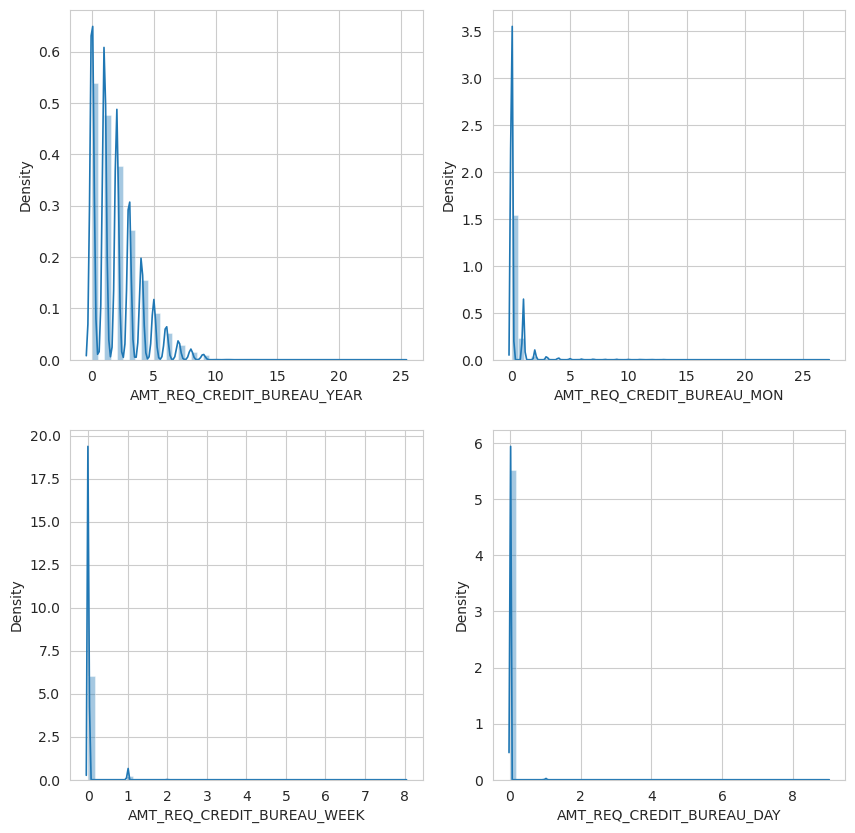

In [8]:
# distribution of numerical features that have missing values pt.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

# Preprocessing

## Impute Missing Value Using Median and Most Frequent (Mode)

In [9]:
category_columns = train.select_dtypes(include=['object']).columns.tolist()
integer_columns = train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in train:
    if train[column].isnull().any():
        if(column in category_columns):
            train[column]=train[column].fillna(train[column].mode()[0])
        else:
            train[column]=train[column].fillna(train[column].median())

In [10]:
# after imputation
print('Missing values status:', train.isnull().values.any())
print('\nThe number of missing values for each columns (after imputation): \n')
nvc = pd.DataFrame(train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False

The number of missing values for each columns (after imputation): 



,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,TARGET,0,0.0
2,NAME_CONTRACT_TYPE,0,0.0
3,CODE_GENDER,0,0.0
4,FLAG_OWN_CAR,0,0.0
...,...,...,...
68,AMT_REQ_CREDIT_BUREAU_DAY,0,0.0
69,AMT_REQ_CREDIT_BUREAU_WEEK,0,0.0
70,AMT_REQ_CREDIT_BUREAU_MON,0,0.0
71,AMT_REQ_CREDIT_BUREAU_QRT,0,0.0


## Feature Engineer

## Convert Days Birth into Age Years

In [11]:
# Konversi umur dari hari ke tahun
train['AGE_YEARS'] = (train['DAYS_BIRTH'] * -1) / 365.25

# Hapus kolom DAYS_BIRTH
train.drop(columns=['DAYS_BIRTH'], inplace=True)

# Cek hasil
print(train[['AGE_YEARS']].head())

   AGE_YEARS
0  25.902806
1  45.900068
2  52.145106
3  52.032854
4  54.570842


## Convert Days Employed into Years Employed

In [12]:
# Drop baris dengan nilai anomali di DAYS_EMPLOYED
train = train[train['DAYS_EMPLOYED'] != 365243]

# Tambahkan kolom YEARS_EMPLOYED dari DAYS_EMPLOYED yang sudah bersih
train['YEARS_EMPLOYED'] = (train['DAYS_EMPLOYED'] * -1) / 365.25

# Optional: drop kolom DAYS_EMPLOYED jika sudah tidak dibutuhkan
train.drop(columns=['DAYS_EMPLOYED'], inplace=True)

# Cek hasil
print(train[['YEARS_EMPLOYED']].head())


   YEARS_EMPLOYED
0        1.744011
1        3.252567
2        0.616016
3        8.320329
4        8.317591


/tmp/ipykernel_2735/1279742895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['YEARS_EMPLOYED'] = (train['DAYS_EMPLOYED'] * -1) / 365.25
/tmp/ipykernel_2735/1279742895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['DAYS_EMPLOYED'], inplace=True)


## Find the Difference between Days Published and Days Registration

In [13]:
# 1. Membuat fitur selisih absolut
train['ABS_DIFF_REG_IDPUB_DAYS'] = np.abs(train['DAYS_ID_PUBLISH'] - train['DAYS_REGISTRATION'])

# 2. Daftar kolom yang akan di-drop
columns_to_drop = ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

# 3. Drop kolom-kolom tersebut dari DataFrame 'train'
#    inplace=True memodifikasi DataFrame secara langsung
#    axis=1 menunjukkan bahwa kita menghapus kolom (bukan baris)
train.drop(columns=columns_to_drop, axis=1, inplace=True)

# Tampilkan beberapa baris pertama dari DataFrame 'train' yang sudah dimodifikasi
# untuk melihat fitur baru dan memastikan kolom lama sudah hilang.
print("DataFrame 'train' setelah feature engineering dan drop kolom:")
print(train.head())

# Anda juga bisa memeriksa kolom yang tersisa:
print("\nKolom yang tersisa di DataFrame 'train':")
print(train.columns.tolist())

DataFrame 'train' setelah feature engineering dan drop kolom:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AM

/tmp/ipykernel_2735/752206799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ABS_DIFF_REG_IDPUB_DAYS'] = np.abs(train['DAYS_ID_PUBLISH'] - train['DAYS_REGISTRATION'])
/tmp/ipykernel_2735/752206799.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=columns_to_drop, axis=1, inplace=True)


## Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
le = LabelEncoder()

# Pilih kolom kategorikal (tipe object)
cat_cols = train.select_dtypes(include="object").columns

# Label Encoding setiap kolom kategorikal
for col in cat_cols:
    train[col] = le.fit_transform(train[col])

# Cek hasil
print(train[cat_cols].head())

   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            1             0                1   
1                   0            0             0                0   
2                   1            1             1                1   
3                   0            0             0                1   
4                   0            1             0                1   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   3   
1                1                 4                    1                   1   
2                6                 7                    4                   3   
3                6                 7                    4                   0   
4                6                 7                    4                   3   

   NAME_HOUSING_TYPE  OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  \
0                  1         

In [13]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,1,1,1,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,0,0,1,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,1,1,0,1,0,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Selection

In [14]:
train = train.drop(['SK_ID_CURR'], axis=1)

In [17]:
# Daftar kolom dengan nilai negatif yang ingin dikonversi ke nilai positif
negative_day_columns = [
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "DAYS_ID_PUBLISH",
    "DAYS_REGISTRATION",
    "DAYS_LAST_PHONE_CHANGE"
]

# Ubah nilai kolom-kolom tersebut menjadi positif
train[negative_day_columns] = train[negative_day_columns].abs()


In [18]:
X = train.drop(['TARGET'], axis=1)
y = train['TARGET']

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

# Pastikan semua nilai di X >= 0
assert (X >= 0).all().all(), "Chi2 membutuhkan semua nilai X >= 0"

# Pilih 20 fitur terbaik
selector = SelectKBest(score_func=chi2, k=20)
fit = selector.fit(X, y)

# Gabungkan nama fitur dan skor
dfscores = pd.DataFrame(fit.scores_, columns=["Score"])
dfcolumns = pd.DataFrame(X.columns, columns=["Features"])
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

# Tampilkan fitur yang paling berkorelasi
print("Top 20 features that correlate well with target feature (chi2 score):\n")
print(featureScores.sort_values(by='Score', ascending=False).head(20))

# Ambil nama fitur terbaik
best_features = dfcolumns.iloc[fit.get_support(indices=True)]["Features"].tolist()

# Simpan DataFrame hanya dengan fitur terpilih + TARGET
train = train[best_features + ["TARGET"]]

Top 20 features that correlate well with target feature (chi2 score):

                    Features         Score
16             DAYS_EMPLOYED  1.954124e+08
8            AMT_GOODS_PRICE  1.223080e+08
6                 AMT_CREDIT  7.669987e+07
15                DAYS_BIRTH  2.235391e+06
5           AMT_INCOME_TOTAL  1.624102e+06
17         DAYS_REGISTRATION  1.348566e+06
44    DAYS_LAST_PHONE_CHANGE  6.656876e+05
18           DAYS_ID_PUBLISH  6.195946e+05
7                AMT_ANNUITY  3.913092e+05
37         ORGANIZATION_TYPE  4.138607e+03
10          NAME_INCOME_TYPE  9.349036e+02
35    REG_CITY_NOT_WORK_CITY  6.153774e+02
1                CODE_GENDER  6.056293e+02
38              EXT_SOURCE_2  5.594802e+02
34    REG_CITY_NOT_LIVE_CITY  5.587089e+02
11       NAME_EDUCATION_TYPE  4.867541e+02
41  DEF_30_CNT_SOCIAL_CIRCLE  4.491174e+02
39              EXT_SOURCE_3  4.424617e+02
43  DEF_60_CNT_SOCIAL_CIRCLE  3.978737e+02
36   LIVE_CITY_NOT_WORK_CITY  2.667885e+02


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CODE_GENDER               307511 non-null  int64  
 1   AMT_INCOME_TOTAL          307511 non-null  float64
 2   AMT_CREDIT                307511 non-null  float64
 3   AMT_ANNUITY               307511 non-null  float64
 4   AMT_GOODS_PRICE           307511 non-null  float64
 5   NAME_INCOME_TYPE          307511 non-null  int64  
 6   NAME_EDUCATION_TYPE       307511 non-null  int64  
 7   DAYS_BIRTH                307511 non-null  int64  
 8   DAYS_EMPLOYED             307511 non-null  int64  
 9   DAYS_REGISTRATION         307511 non-null  float64
 10  DAYS_ID_PUBLISH           307511 non-null  int64  
 11  REG_CITY_NOT_LIVE_CITY    307511 non-null  int64  
 12  REG_CITY_NOT_WORK_CITY    307511 non-null  int64  
 13  LIVE_CITY_NOT_WORK_CITY   307511 non-null  i

In [28]:
train.tail(10)

,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,TARGET
307501,0,81000.0,269550.0,11871.0,225000.0,1,4,12961,1046,1398.0,...,0,0,0,14,0.575481,0.535276,1.0,1.0,448.0,0
307502,0,94500.0,225000.0,10620.0,225000.0,7,4,16063,8736,8672.0,...,0,1,1,39,0.313334,0.735221,0.0,0.0,1516.0,0
307503,0,112500.0,345510.0,17770.5,247500.0,1,1,11870,399,675.0,...,0,0,0,2,0.501221,0.609276,3.0,2.0,2315.0,0
307504,0,153000.0,331920.0,16096.5,225000.0,7,4,16705,7258,9798.0,...,0,0,0,42,0.530725,0.535276,0.0,0.0,0.0,0
307505,0,112500.0,225000.0,22050.0,225000.0,3,4,24384,365243,7369.0,...,0,0,0,57,0.346391,0.742182,0.0,0.0,0.0,0
307506,1,157500.0,254700.0,27558.0,225000.0,7,4,9327,236,8456.0,...,0,0,0,43,0.681632,0.535276,0.0,0.0,273.0,0
307507,0,72000.0,269550.0,12001.5,225000.0,3,4,20775,365243,4388.0,...,0,0,0,57,0.115992,0.535276,0.0,0.0,0.0,0
307508,0,153000.0,677664.0,29979.0,585000.0,7,1,14966,7921,6737.0,...,0,1,1,39,0.535722,0.218859,0.0,0.0,1909.0,0
307509,0,171000.0,370107.0,20205.0,319500.0,1,4,11961,4786,2562.0,...,1,1,0,3,0.514163,0.661024,0.0,0.0,322.0,1
307510,0,157500.0,675000.0,49117.5,675000.0,1,1,16856,1262,5128.0,...,0,1,1,5,0.708569,0.113922,0.0,0.0,787.0,0


In [17]:
# 1. Hitung korelasi antar kolom
correlation_matrix = train.corr(numeric_only=True)

# 2. Ambil korelasi antara setiap fitur dengan kolom TARGET, dan urutkan berdasarkan nilai absolut
target_corr = correlation_matrix["TARGET"].drop("TARGET")  # drop diri sendiri
top_20_features = target_corr.abs().sort_values(ascending=False).head(20).index

# 3. Tampilkan kolom dengan korelasi tertinggi
print("Top 20 features with the highest correlation to TARGET:\n")
print(target_corr[top_20_features].sort_values(ascending=False))

# 4. Buat DataFrame baru hanya dengan fitur-fitur terpilih + kolom TARGET
train = train[top_20_features.tolist() + ["TARGET"]]

Top 20 features with the highest correlation to TARGET:

REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_EDUCATION_TYPE            0.054699
CODE_GENDER                    0.054692
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
NAME_INCOME_TYPE               0.046829
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
NAME_HOUSING_TYPE              0.034489
LIVE_CITY_NOT_WORK_CITY        0.032518
REGION_POPULATION_RELATIVE    -0.037227
AMT_GOODS_PRICE               -0.039623
DAYS_REGISTRATION             -0.041975
DAYS_EMPLOYED                 -0.047046
DAYS_BIRTH                    -0.078239
EXT_SOURCE_3                  -0.155892
EXT_SOURCE_2                  -0.160295
Name: TARGET, dtype: float64


## Normalisasi Data

In [33]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


print("Deskripsi data SEBELUM normalisasi (contoh beberapa kolom):")
if 'TARGET' in train.columns:
    # Pilih beberapa kolom numerik non-target untuk ditampilkan
    sample_numeric_cols = [col for col in train.columns if train[col].dtype in [np.int64, np.float64] and col != 'TARGET'][:3]
    if sample_numeric_cols:
        print(train[sample_numeric_cols].describe())
    else:
        print("Tidak ada kolom numerik non-target untuk ditampilkan.")
else:
    print("Kolom 'TARGET' tidak ditemukan. Harap periksa nama kolom.")


# 1. Identifikasi kolom yang akan dinormalisasi
# Kita hanya ingin menormalisasi kolom numerik dan mengecualikan 'TARGET'
if 'TARGET' in train.columns:
    columns_to_normalize = train.select_dtypes(include=np.number).columns.tolist()
    # Hapus 'TARGET' dari daftar jika ada
    if 'TARGET' in columns_to_normalize:
        columns_to_normalize.remove('TARGET')
else:
    print("Peringatan: Kolom 'TARGET' tidak ditemukan di DataFrame. Semua kolom numerik akan dinormalisasi.")
    columns_to_normalize = train.select_dtypes(include=np.number).columns.tolist()

# Pastikan ada kolom yang akan dinormalisasi
if not columns_to_normalize:
    print("Tidak ada kolom numerik yang akan dinormalisasi (setelah mengecualikan TARGET).")
else:
    # 2. Inisialisasi MinMaxScaler
    scaler = MinMaxScaler()

    # 3. Terapkan fit_transform pada kolom yang dipilih
    #   Penting: scaler.fit_transform() mengembalikan array NumPy.
    #   Kita perlu memasukkannya kembali ke DataFrame dengan nama kolom yang benar.
    #   Kita juga hanya melakukan ini pada bagian DataFrame yang berisi kolom yang akan dinormalisasi.
    
    # Simpan data asli dari kolom yang akan dinormalisasi untuk ditransformasi
    data_to_normalize = train[columns_to_normalize]
    
    # Lakukan scaling
    scaled_data = scaler.fit_transform(data_to_normalize)
    
    # Buat DataFrame baru dari data yang sudah di-scale dengan nama kolom yang sama
    scaled_df_part = pd.DataFrame(scaled_data, columns=columns_to_normalize, index=train.index)
    
    # Perbarui kolom-kolom di DataFrame 'train' asli dengan nilai yang sudah di-scale
    train[columns_to_normalize] = scaled_df_part

    print("\nDeskripsi data SETELAH normalisasi (contoh beberapa kolom yang dinormalisasi):")
    if sample_numeric_cols and all(col in train.columns for col in sample_numeric_cols): # Pastikan kolom masih ada
        print(train[sample_numeric_cols].describe())
    elif columns_to_normalize:
        print(train[columns_to_normalize[:min(3, len(columns_to_normalize))]].describe())
    else:
        print("Tidak ada kolom yang dinormalisasi untuk ditampilkan.")

    print("\nContoh beberapa baris pertama dari DataFrame 'train' setelah normalisasi:")
    print(train.head())

    # Verifikasi bahwa kolom 'TARGET' tidak berubah (jika ada)
    if 'TARGET' in train.columns:
        print("\nVerifikasi kolom 'TARGET' (seharusnya tidak ternormalisasi):")
        print(train['TARGET'].describe())
        # Jika TARGET adalah biner, value_counts lebih informatif
        if set(train['TARGET'].unique()).issubset({0, 1, np.nan}): # Periksa jika hanya 0, 1, atau NaN
             print(train['TARGET'].value_counts(dropna=False))

Deskripsi data SEBELUM normalisasi (contoh beberapa kolom):
         CODE_GENDER  AMT_INCOME_TOTAL    AMT_CREDIT
count  307511.000000      3.075110e+05  3.075110e+05
mean        0.341669      1.687979e+05  5.990260e+05
std         0.474297      2.371231e+05  4.024908e+05
min         0.000000      2.565000e+04  4.500000e+04
25%         0.000000      1.125000e+05  2.700000e+05
50%         0.000000      1.471500e+05  5.135310e+05
75%         1.000000      2.025000e+05  8.086500e+05
max         2.000000      1.170000e+08  4.050000e+06

Deskripsi data SETELAH normalisasi (contoh beberapa kolom yang dinormalisasi):
         CODE_GENDER  AMT_INCOME_TOTAL     AMT_CREDIT
count  307511.000000     307511.000000  307511.000000
mean        0.170835          0.001224       0.138334
std         0.237149          0.002027       0.100497
min         0.000000          0.000000       0.000000
25%         0.000000          0.000742       0.056180
50%         0.000000          0.001039       0.116987
75%  

## Oversampling Minority Class Using Smote

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = train.drop(columns=["TARGET"])
y = train["TARGET"]

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Tampilkan distribusi baru setelah SMOTE
print("Distribusi setelah SMOTE:")
print(y_resampled.value_counts())

Distribusi setelah SMOTE:
TARGET
1    282686
0    282686
Name: count, dtype: int64


# Training Model & Evaluation

## Train Test Split

In [35]:
# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

## Logistic Regression

Accuracy: 0.5795357063895644
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59     56538
           1       0.58      0.55      0.57     56537

    accuracy                           0.58    113075
   macro avg       0.58      0.58      0.58    113075
weighted avg       0.58      0.58      0.58    113075



/home/nicholas/miniforge3/envs/rapids-24.10/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


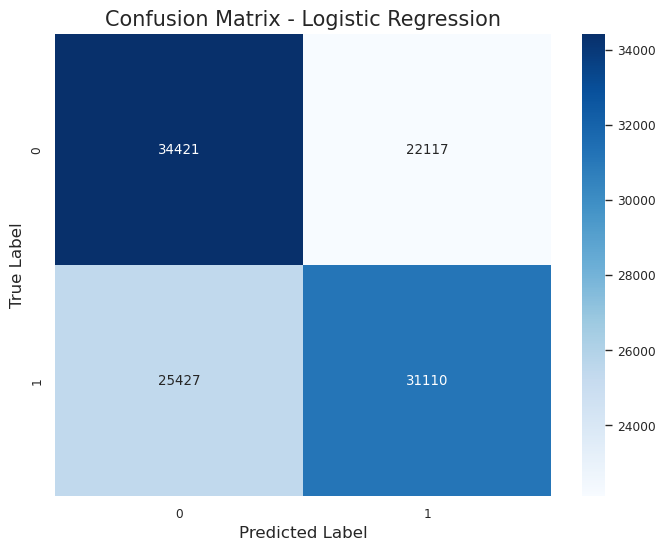

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model
model = LogisticRegression(max_iter=1000, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# --- Visualisasi Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# Dapatkan nama kelas jika tersedia (misalnya dari model.classes_ atau Anda tahu)
# Jika y_test berisi 0 dan 1, nama kelas bisa ['Kelas 0', 'Kelas 1'] atau lebih deskriptif
# Jika model Anda sudah di-fit, Anda bisa menggunakan model.classes_
try:
    class_names = [str(c) for c in model.classes_] # Mengambil nama kelas dari model
                                                  # dan mengubahnya jadi string jika perlu
    # Anda bisa mengganti ini dengan label yang lebih deskriptif jika tahu artinya:
    # Contoh: class_names = ['Non-Default', 'Default'] jika 0 adalah Non-Default dan 1 adalah Default
except AttributeError:
    class_names = np.unique(np.concatenate((y_test, y_pred))).astype(str) # Fallback jika model.classes_ tidak ada

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
# annot=True: Menampilkan angka di dalam setiap sel
# fmt='d': Format angka sebagai integer (desimal)
# cmap='Blues': Skema warna heatmap

plt.title('Confusion Matrix - Logistic Regression', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()


In [46]:
# Dapatkan probabilitas prediksi untuk kelas 1 (payment difficulties)
y_proba = model.predict_proba(X_test)[:, 1]

# Hitung ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5068006323936229


## Random Forest Classifier

Melatih model RandomForestClassifier...
Model selesai dilatih.
Melakukan prediksi pada data test...
Prediksi selesai.

--- Evaluasi RandomForestClassifier ---
Accuracy: 0.9307716117621048
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     56538
           1       0.94      0.92      0.93     56537

    accuracy                           0.93    113075
   macro avg       0.93      0.93      0.93    113075
weighted avg       0.93      0.93      0.93    113075



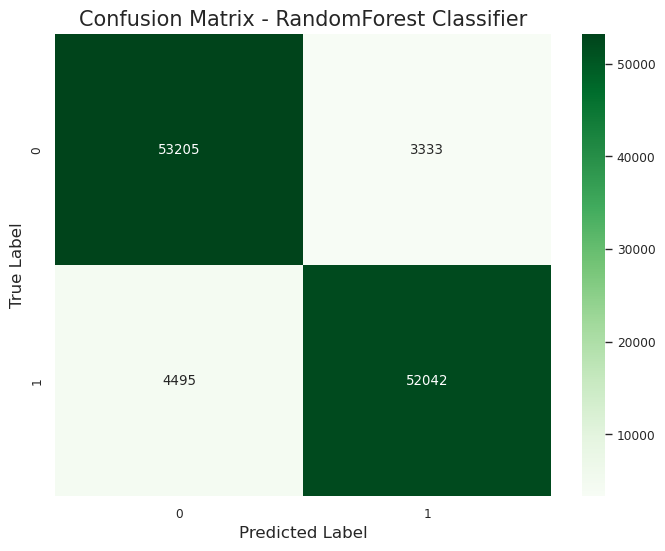

In [36]:
from sklearn.ensemble import RandomForestClassifier # Mengimpor RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Untuk contoh data jika diperlukan
from sklearn.model_selection import train_test_split # Untuk contoh data

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# --------------------------------------------------------------------

# Latih model
print("Melatih model RandomForestClassifier...")
model_rf.fit(X_train, y_train)
print("Model selesai dilatih.")

# Prediksi
print("Melakukan prediksi pada data test...")
y_pred_rf = model_rf.predict(X_test)
print("Prediksi selesai.")

# Evaluasi
print("\n--- Evaluasi RandomForestClassifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# --- Visualisasi Confusion Matrix ---
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Dapatkan nama kelas
try:
    class_names_rf = [str(c) for c in model_rf.classes_]
    # Contoh: class_names_rf = ['Non-Default', 'Default']
except AttributeError:
    class_names_rf = np.unique(np.concatenate((y_test, y_pred_rf))).astype(str)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', # Menggunakan cmap yang berbeda agar mudah dibedakan
            xticklabels=class_names_rf, yticklabels=class_names_rf)
plt.title('Confusion Matrix - RandomForest Classifier', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

In [42]:
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC AUC Score - Random Forest:", roc_auc_rf)


ROC AUC Score - Random Forest: 0.9800881026427063


Top 10 Fitur Terpenting:
                     Feature  Importance
16              EXT_SOURCE_3    0.104001
15              EXT_SOURCE_2    0.098470
4            AMT_GOODS_PRICE    0.097691
1           AMT_INCOME_TOTAL    0.083708
2                 AMT_CREDIT    0.071499
17  DEF_30_CNT_SOCIAL_CIRCLE    0.066770
3                AMT_ANNUITY    0.063190
19    DAYS_LAST_PHONE_CHANGE    0.062259
7                 DAYS_BIRTH    0.057293
8              DAYS_EMPLOYED    0.057032


/tmp/ipykernel_2983/2006066038.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


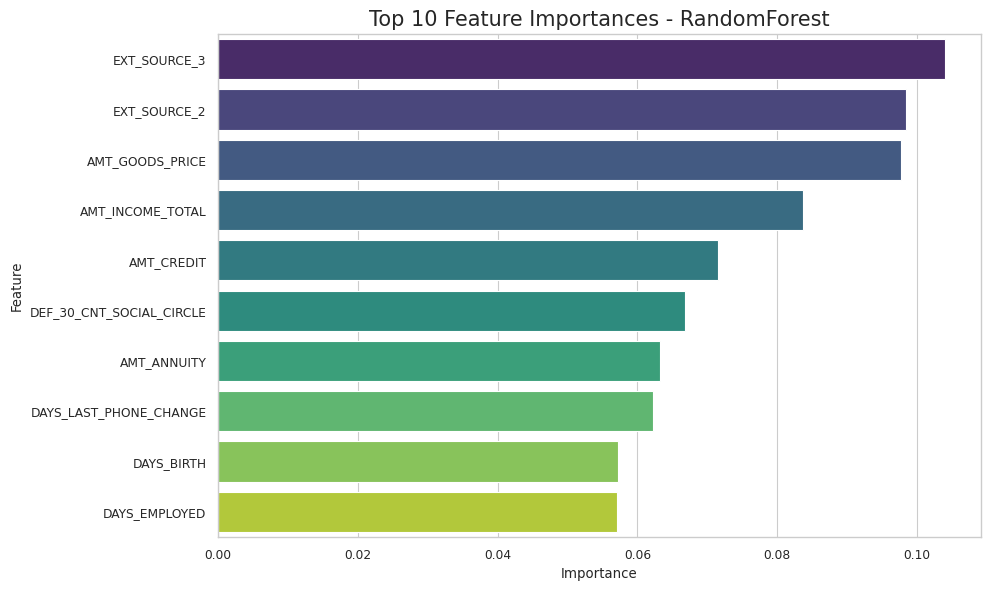

In [47]:
# Ambil importance dari setiap fitur
importances = model_rf.feature_importances_

# Buat DataFrame untuk visualisasi
feature_names = X_train.columns  # Ganti jika X_train Anda adalah array, misalnya gunakan fitur manual
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan 10 fitur teratas
print("Top 10 Fitur Terpenting:")
print(feature_importance_df.head(10))

# Visualisasi dengan barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances - RandomForest', fontsize=15)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Gaussian Naive Bayes

Melatih model GaussianNB...
Model selesai dilatih.

--- Evaluasi Gaussian Naive Bayes ---
Accuracy: 0.6348529736900287
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.80      0.69     56538
           1       0.70      0.47      0.56     56537

    accuracy                           0.63    113075
   macro avg       0.65      0.63      0.63    113075
weighted avg       0.65      0.63      0.63    113075



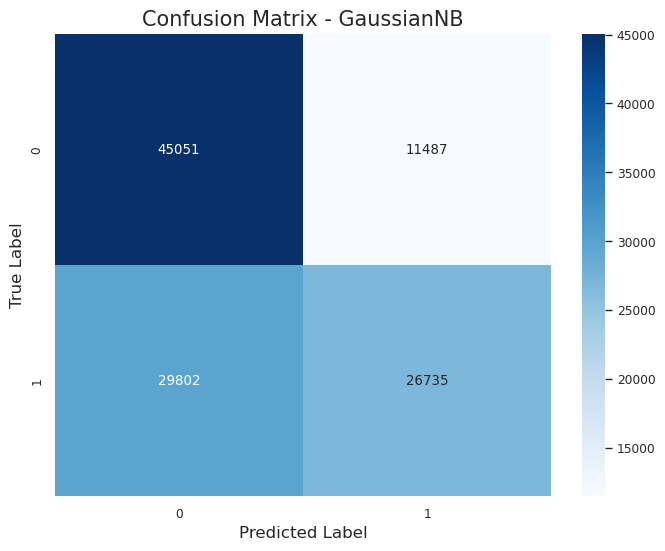

In [37]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model
model_nb = GaussianNB()

# Latih model
print("Melatih model GaussianNB...")
model_nb.fit(X_train, y_train)
print("Model selesai dilatih.")

# Prediksi
y_pred_nb = model_nb.predict(X_test)

# Evaluasi
print("\n--- Evaluasi Gaussian Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
class_names_nb = np.unique(np.concatenate((y_test, y_pred_nb))).astype(str)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_nb, yticklabels=class_names_nb)
plt.title('Confusion Matrix - GaussianNB', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()


In [43]:
y_proba_nb = model_nb.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
print("ROC AUC Score - Gaussian Naive Bayes:", roc_auc_nb)


ROC AUC Score - Gaussian Naive Bayes: 0.6959835642864578


## Decision Tree

Melatih model DecisionTreeClassifier...
Model selesai dilatih.

--- Evaluasi Decision Tree ---
Accuracy: 0.839610877736016
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84     56538
           1       0.83      0.86      0.84     56537

    accuracy                           0.84    113075
   macro avg       0.84      0.84      0.84    113075
weighted avg       0.84      0.84      0.84    113075



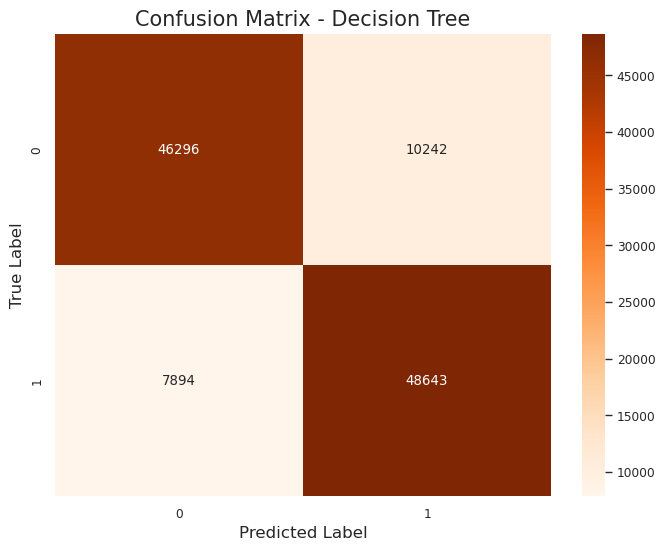

In [38]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

print("Melatih model DecisionTreeClassifier...")
model_dt.fit(X_train, y_train)
print("Model selesai dilatih.")

y_pred_dt = model_dt.predict(X_test)

print("\n--- Evaluasi Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
class_names_dt = np.unique(np.concatenate((y_test, y_pred_dt))).astype(str)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names_dt, yticklabels=class_names_dt)
plt.title('Confusion Matrix - Decision Tree', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()


In [44]:
y_proba_dt = model_dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print("ROC AUC Score - Decision Tree:", roc_auc_dt)


ROC AUC Score - Decision Tree: 0.8396110613624634


## K-Nearest Neighbors

Melatih model K-Nearest Neighbors...
Model selesai dilatih.

--- Evaluasi K-Nearest Neighbors ---
Accuracy: 0.8520362591200531
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83     56538
           1       0.77      1.00      0.87     56537

    accuracy                           0.85    113075
   macro avg       0.88      0.85      0.85    113075
weighted avg       0.88      0.85      0.85    113075



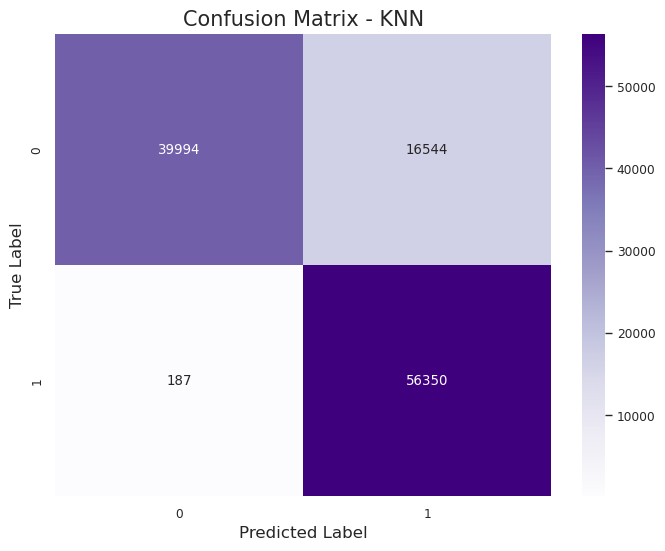

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)  # Kamu bisa sesuaikan n_neighbors

print("Melatih model K-Nearest Neighbors...")
model_knn.fit(X_train, y_train)
print("Model selesai dilatih.")

y_pred_knn = model_knn.predict(X_test)

print("\n--- Evaluasi K-Nearest Neighbors ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
class_names_knn = np.unique(np.concatenate((y_test, y_pred_knn))).astype(str)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names_knn, yticklabels=class_names_knn)
plt.title('Confusion Matrix - KNN', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()


In [45]:
y_proba_knn = model_knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
print("ROC AUC Score - KNN:", roc_auc_knn)


ROC AUC Score - KNN: 0.9475900090923075
